In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
import requests
key = "90033819e987ba9326eeea17a8cd9074e35f8ca3"
url = f"https://api.tiingo.com/tiingo/daily/aapl/prices?startDate=2020-01-01&endDate=2024-01-01&token={key}"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data[:5])
else:
    print(f"Failed to retrieve data: {response.status_code}")


[{'date': '2020-01-02T00:00:00.000Z', 'close': 300.35, 'high': 300.6, 'low': 295.19, 'open': 296.24, 'volume': 33911864, 'adjClose': 72.7972928887, 'adjHigh': 72.8578866068, 'adjLow': 71.5466385478, 'adjOpen': 71.8011321637, 'adjVolume': 135647456, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-01-03T00:00:00.000Z', 'close': 297.43, 'high': 300.58, 'low': 296.5, 'open': 297.15, 'volume': 36633878, 'adjClose': 72.0895582617, 'adjHigh': 72.8530391094, 'adjLow': 71.8641496305, 'adjOpen': 72.0216932974, 'adjVolume': 146535512, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-01-06T00:00:00.000Z', 'close': 299.8, 'high': 299.96, 'low': 292.75, 'open': 293.79, 'volume': 29644644, 'adjClose': 72.663986709, 'adjHigh': 72.7027666885, 'adjLow': 70.9552438594, 'adjOpen': 71.2073137266, 'adjVolume': 118578576, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-01-07T00:00:00.000Z', 'close': 298.39, 'high': 300.9, 'low': 297.48, 'open': 299.84, 'volume': 27877655, 'adjClose': 72.3222381391

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02T00:00:00.000Z,300.35,300.60,295.190,296.24,33911864,72.797293,72.857887,71.546639,71.801132,135647456,0.0,1.0
1,2020-01-03T00:00:00.000Z,297.43,300.58,296.500,297.15,36633878,72.089558,72.853039,71.864150,72.021693,146535512,0.0,1.0
2,2020-01-06T00:00:00.000Z,299.80,299.96,292.750,293.79,29644644,72.663987,72.702767,70.955244,71.207314,118578576,0.0,1.0
3,2020-01-07T00:00:00.000Z,298.39,300.90,297.480,299.84,27877655,72.322238,72.930599,72.101677,72.673682,111510620,0.0,1.0
4,2020-01-08T00:00:00.000Z,303.19,304.44,297.160,297.16,33090946,73.485638,73.788606,72.024117,72.024117,132363784,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2023-12-22T00:00:00.000Z,193.60,195.41,192.970,195.18,37149570,192.656691,194.457872,192.029760,194.228992,37149570,0.0,1.0
1002,2023-12-26T00:00:00.000Z,193.05,193.89,192.830,193.61,28919310,192.109371,192.945278,191.890442,192.666642,28919310,0.0,1.0
1003,2023-12-27T00:00:00.000Z,193.15,193.50,191.090,192.49,47899806,192.208883,192.557178,190.158921,191.552099,47899806,0.0,1.0
1004,2023-12-28T00:00:00.000Z,193.58,194.66,193.170,194.14,34049898,192.636788,193.711526,192.228786,193.194060,34049898,0.0,1.0


In [ ]:
df.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02 00:00:00+00:00,300.35,300.60,295.19,296.24,33911864,72.797293,72.857887,71.546639,71.801132,135647456,0.0,1.0
1,2020-01-03 00:00:00+00:00,297.43,300.58,296.50,297.15,36633878,72.089558,72.853039,71.864150,72.021693,146535512,0.0,1.0
2,2020-01-06 00:00:00+00:00,299.80,299.96,292.75,293.79,29644644,72.663987,72.702767,70.955244,71.207314,118578576,0.0,1.0
3,2020-01-07 00:00:00+00:00,298.39,300.90,297.48,299.84,27877655,72.322238,72.930599,72.101677,72.673682,111510620,0.0,1.0
4,2020-01-08 00:00:00+00:00,303.19,304.44,297.16,297.16,33090946,73.485638,73.788606,72.024117,72.024117,132363784,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date         1006 non-null   datetime64[ns, UTC]
 1   close        1006 non-null   float64            
 2   high         1006 non-null   float64            
 3   low          1006 non-null   float64            
 4   open         1006 non-null   float64            
 5   volume       1006 non-null   int64              
 6   adjClose     1006 non-null   float64            
 7   adjHigh      1006 non-null   float64            
 8   adjLow       1006 non-null   float64            
 9   adjOpen      1006 non-null   float64            
 10  adjVolume    1006 non-null   int64              
 11  divCash      1006 non-null   float64            
 12  splitFactor  1006 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(10), int64(2)
memory usage: 102.3 KB


In [ ]:
df.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0
adjLow,0
adjOpen,0


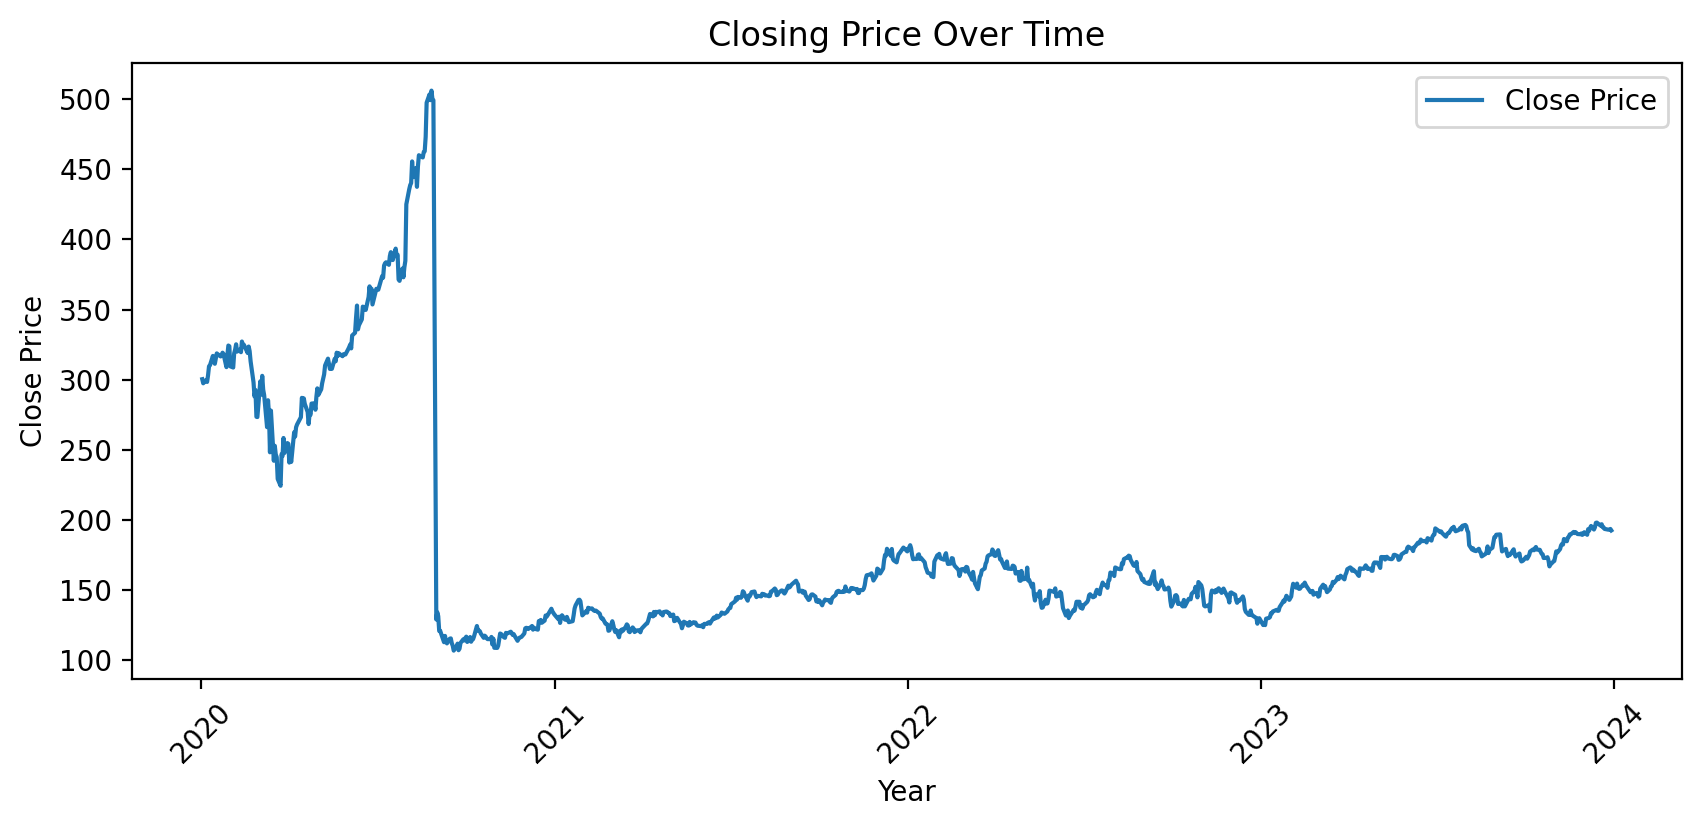

In [ ]:
plt.figure(figsize=(10, 4), dpi=200)

# Plot 'Close' prices with 'date' on the x-axis
plt.plot(df['date'], df['close'], label='Close Price')

# Formatting the x-axis to show years (date format as YYYY)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Setting the frequency of the ticks (show every year, or every few years depending on the data)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))  # Adjust 1 to the frequency you need

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

plt.title('Closing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()


In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,1.000000,-0.399556,-0.404013,-0.395188,-0.399488,-0.106005,0.876740,0.876324,0.876688,0.875381,-0.635653,-0.047618,-0.036438
close,-0.399556,1.000000,0.999504,0.999508,0.999017,-0.513169,-0.461577,-0.467024,-0.459395,-0.464558,0.414531,0.091243,-0.022474
high,-0.404013,0.999504,1.000000,0.999351,0.999549,-0.504898,-0.467657,-0.472001,-0.465023,-0.469392,0.428021,0.091299,-0.022266
low,-0.395188,0.999508,0.999351,1.000000,0.999541,-0.520933,-0.456673,-0.461681,-0.453431,-0.458498,0.402061,0.092035,-0.023147
open,-0.399488,0.999017,0.999549,0.999541,1.000000,-0.511408,-0.461819,-0.466019,-0.458475,-0.462475,0.414976,0.093143,-0.023076
volume,-0.106005,-0.513169,-0.504898,-0.520933,-0.511408,1.000000,0.054154,0.070481,0.040885,0.059082,0.386300,-0.052988,0.125247
adjClose,0.876740,-0.461577,-0.467657,-0.456673,-0.461819,0.054154,1.000000,0.999053,0.999115,0.997986,-0.648378,-0.047922,-0.011994
adjHigh,0.876324,-0.467024,-0.472001,-0.461681,-0.466019,0.070481,0.999053,1.000000,0.998935,0.999223,-0.637769,-0.048766,-0.011553
adjLow,0.876688,-0.459395,-0.465023,-0.453431,-0.458475,0.040885,0.999115,0.998935,1.000000,0.999071,-0.657838,-0.047512,-0.013300
adjOpen,0.875381,-0.464558,-0.469392,-0.458498,-0.462475,0.059082,0.997986,0.999223,0.999071,1.000000,-0.646406,-0.047113,-0.013214


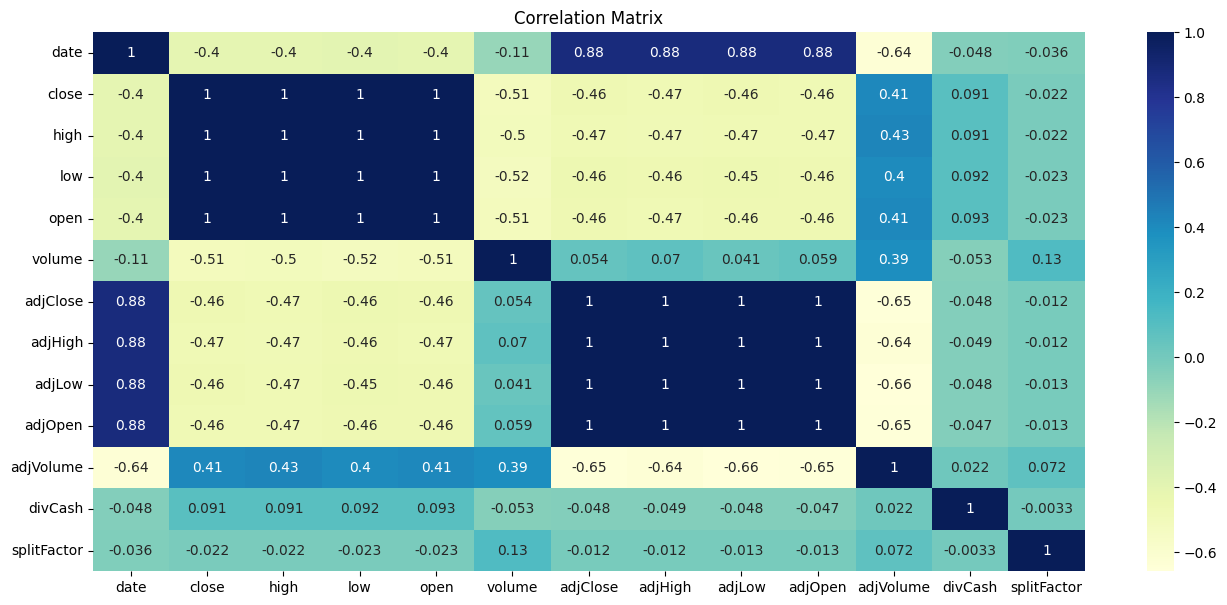

In [ ]:
plt.figure(figsize=(16, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02 00:00:00+00:00,300.35,300.60,295.19,296.24,33911864,72.797293,72.857887,71.546639,71.801132,135647456,0.0,1.0
1,2020-01-03 00:00:00+00:00,297.43,300.58,296.50,297.15,36633878,72.089558,72.853039,71.864150,72.021693,146535512,0.0,1.0
2,2020-01-06 00:00:00+00:00,299.80,299.96,292.75,293.79,29644644,72.663987,72.702767,70.955244,71.207314,118578576,0.0,1.0
3,2020-01-07 00:00:00+00:00,298.39,300.90,297.48,299.84,27877655,72.322238,72.930599,72.101677,72.673682,111510620,0.0,1.0
4,2020-01-08 00:00:00+00:00,303.19,304.44,297.16,297.16,33090946,73.485638,73.788606,72.024117,72.024117,132363784,0.0,1.0


In [ ]:
df['close']

,close
0,300.35
1,297.43
2,299.80
3,298.39
4,303.19
...,...
1001,193.60
1002,193.05
1003,193.15
1004,193.58


In [ ]:
df['7_day_ma'] = df['close'].rolling(window=7).mean()
df['30_day_ma'] = df['close'].rolling(window=30).mean()
df['200_day_ma'] = df['close'].rolling(window=200).mean()

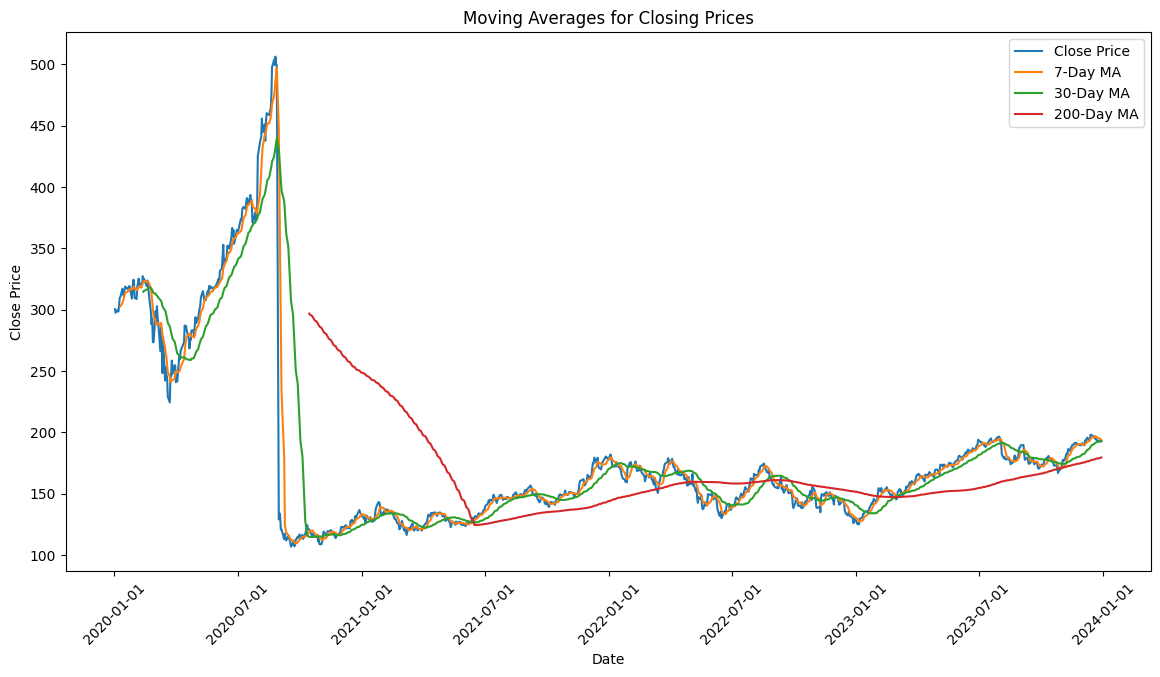

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['7_day_ma'], label='7-Day MA')
plt.plot(df['date'], df['30_day_ma'], label='30-Day MA')
plt.plot(df['date'], df['200_day_ma'], label='200-Day MA')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.title('Moving Averages for Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,7_day_ma,30_day_ma,200_day_ma
0,2020-01-02 00:00:00+00:00,300.35,300.60,295.19,296.24,33911864,72.797293,72.857887,71.546639,71.801132,135647456,0.0,1.0,NaN,NaN,NaN
1,2020-01-03 00:00:00+00:00,297.43,300.58,296.50,297.15,36633878,72.089558,72.853039,71.864150,72.021693,146535512,0.0,1.0,NaN,NaN,NaN
2,2020-01-06 00:00:00+00:00,299.80,299.96,292.75,293.79,29644644,72.663987,72.702767,70.955244,71.207314,118578576,0.0,1.0,NaN,NaN,NaN
3,2020-01-07 00:00:00+00:00,298.39,300.90,297.48,299.84,27877655,72.322238,72.930599,72.101677,72.673682,111510620,0.0,1.0,NaN,NaN,NaN
4,2020-01-08 00:00:00+00:00,303.19,304.44,297.16,297.16,33090946,73.485638,73.788606,72.024117,72.024117,132363784,0.0,1.0,NaN,NaN,NaN


In [ ]:
df['volatility'] = df['close'].rolling(window=30).std()


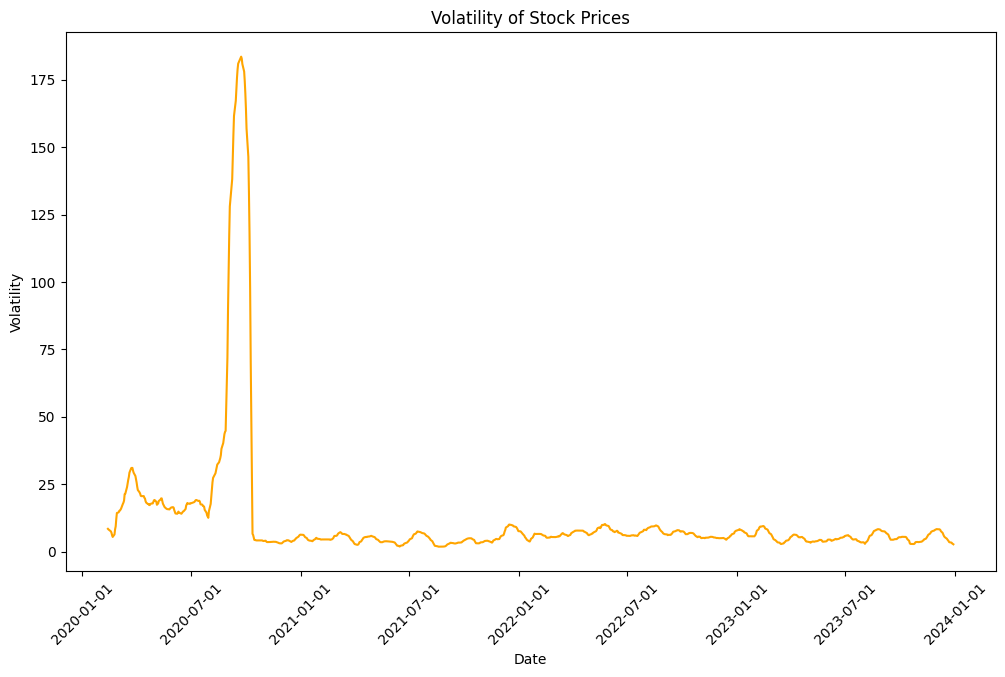

In [ ]:

plt.figure(figsize=(12, 7))
plt.plot(df['date'], df['volatility'], label='30-Day Volatility', color='orange')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Volatility of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df = df.drop(columns = ['7_day_ma', '30_day_ma', '200_day_ma', 'volatility'])

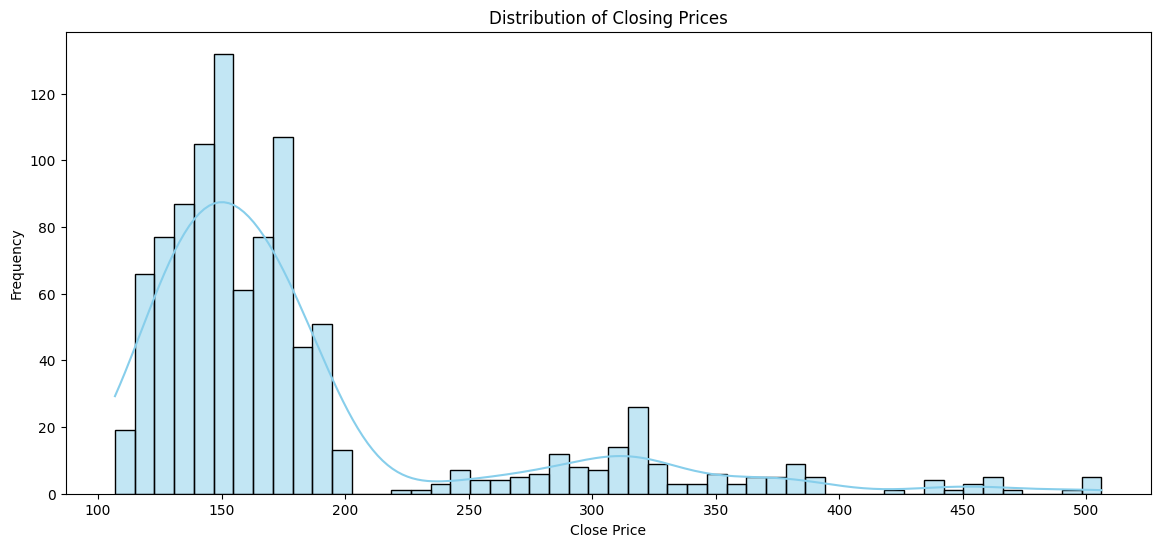

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(df['close'], bins=50, kde=True, color = 'skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


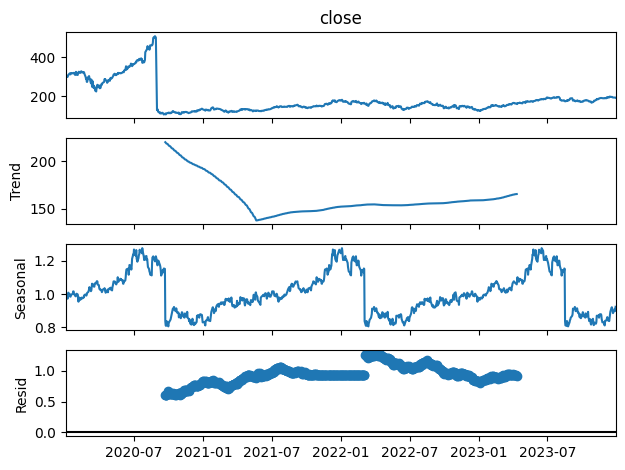

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'date' column as index
df.set_index('date', inplace=True)

# Decompose the time series (assuming daily data)
decomposition = seasonal_decompose(df['close'], model='multiplicative', period=365)  # Adjust period based on data frequency
decomposition.plot()
plt.show()


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df1 = df['close'] # we're are performing stock analysing on CLOSE

In [ ]:
df1

,close
0,300.35
1,297.43
2,299.80
3,298.39
4,303.19
...,...
1001,193.60
1002,193.05
1003,193.15
1004,193.58


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size = int(len(df1)*0.70)

In [ ]:
test_size = len(df1) - training_size
train_data = df1[0:training_size]
test_data = df1[training_size:len(df1)]

In [ ]:
print(train_data.shape)
print(test_data.shape)

(704, 1)
(302, 1)


In [ ]:
train_data

array([[4.84683782e-01],
       [4.77370069e-01],
       [4.83306199e-01],
       [4.79774577e-01],
       [4.91797120e-01],
       [5.07927364e-01],
       [5.09680651e-01],
       [5.26286788e-01],
       [5.15566688e-01],
       [5.12210394e-01],
       [5.21978710e-01],
       [5.30720100e-01],
       [5.25309956e-01],
       [5.28140263e-01],
       [5.31972448e-01],
       [5.29668128e-01],
       [5.06224170e-01],
       [5.28115216e-01],
       [5.44771446e-01],
       [5.43594239e-01],
       [5.07626800e-01],
       [5.05497808e-01],
       [5.31020664e-01],
       [5.37532874e-01],
       [5.46950532e-01],
       [5.33976205e-01],
       [5.37783344e-01],
       [5.32924233e-01],
       [5.51934878e-01],
       [5.46098936e-01],
       [5.46299311e-01],
       [5.31396368e-01],
       [5.42968065e-01],
       [5.34652473e-01],
       [5.16493425e-01],
       [4.79248591e-01],
       [4.53951158e-01],
       [4.65397621e-01],
       [4.17482780e-01],
       [4.17082029e-01],


In [ ]:


def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []  # dataX to store Features, dataY to store labels
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step),0]  # Slicing the array correctly
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])  # The value to predict (next value)
    return np.array(dataX), np.array(dataY)

# Assume train_data and test_data are your pandas Series, e.g., 'close' price data
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
#Train Data Example: X_train = [[100, 101, 102], [101, 102, 103]],  y_train = [103,104]


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (603, 100)
y_train shape: (603,)
X_test shape: (201, 100)
y_test shape: (201,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape #(samples, time steps, features)

(603, 100, 1)

In [ ]:
X_train

array([[[0.48468378],
        [0.47737007],
        [0.4833062 ],
        ...,
        [0.52601127],
        [0.53112085],
        [0.52571071]],

       [[0.47737007],
        [0.4833062 ],
        [0.47977458],
        ...,
        [0.53112085],
        [0.52571071],
        [0.52916719]],

       [[0.4833062 ],
        [0.47977458],
        [0.49179712],
        ...,
        [0.52571071],
        [0.52916719],
        [0.52951785]],

       ...,

       [[0.07641828],
        [0.07701941],
        [0.09084534],
        ...,
        [0.08328115],
        [0.0841077 ],
        [0.08050094]],

       [[0.07701941],
        [0.09084534],
        [0.08395742],
        ...,
        [0.0841077 ],
        [0.08050094],
        [0.07889793]],

       [[0.09084534],
        [0.08395742],
        [0.08435817],
        ...,
        [0.08050094],
        [0.07889793],
        [0.09054477]]])

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Initialize the model
model = Sequential()

# Add LSTM layers with dropout to prevent overfitting
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))

# Adding output layer
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# EarlyStopping callback to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training  the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - loss: 0.0300 - val_loss: 3.8764e-04
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - loss: 0.0120 - val_loss: 0.0036
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - loss: 0.0111 - val_loss: 3.4026e-04
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - loss: 0.0074 - val_loss: 3.3675e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 329ms/step - loss: 0.0052 - val_loss: 1.2952e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - loss: 0.0070 - val_loss: 8.7380e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - loss: 0.0047 - val_loss: 3.1724e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - loss: 0.0087 - val_loss: 3.6599e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - loss: 0.0068 - val_loss: 4.1601e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - loss: 0.0047 - val_loss: 2.9278e-04
Epo

In [ ]:
# Make predictions on the train and test sets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


In [ ]:
# Transform the predicted values back to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
test_predict[0]

array([157.14691], dtype=float32)

In [ ]:
# Inverse transform the actual values if they were scaled
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
y_test_original[0]

array([152.59])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Calculate performance metrics for the test set
MAE = mean_absolute_error(y_test_original, test_predict)
MSE = mean_squared_error(y_test_original, test_predict)
RMSE = np.sqrt(MSE)

In [ ]:
# Metrics Values:
print(f"Test Data - MAE: {MAE}")
print(f"Test Data - MSE: {MSE}")
print(f"Test Data - RMSE: {RMSE}")

Test Data - MAE: 3.705439082662857
Test Data - MSE: 20.6448451940761
Test Data - RMSE: 4.5436598897888585


In [ ]:
print(f"Shape of y_test: {y_test_original.shape}")
print(f"Shape of test_predict: {test_predict.shape}")

Shape of y_test: (201, 1)
Shape of test_predict: (201, 1)


In [ ]:
test_residuals = y_test_original - test_predict

In [ ]:
test_residuals.shape

(201, 1)

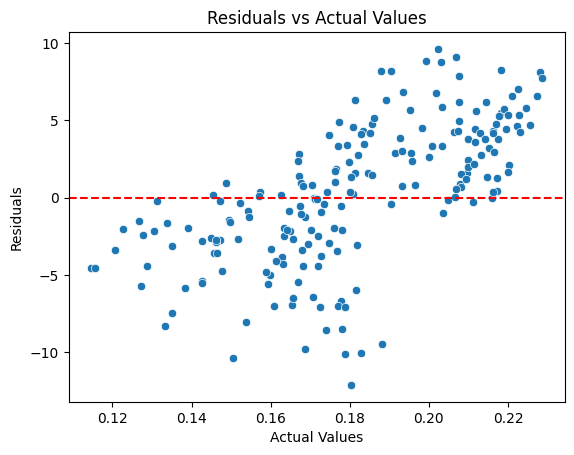

In [ ]:
# Flatten the arrays
y_test = y_test.flatten()
test_residuals = test_residuals.flatten()

sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


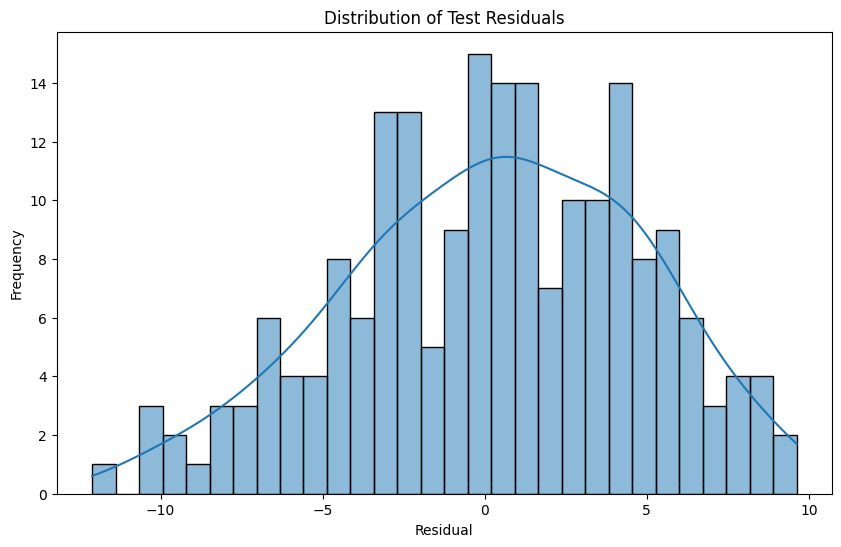

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(test_residuals, kde=True, bins=30)
plt.title('Distribution of Test Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, test_predict)
print(f"R-squared for Test Set: {r2}")


R-squared for Test Set: 0.8278199576657518


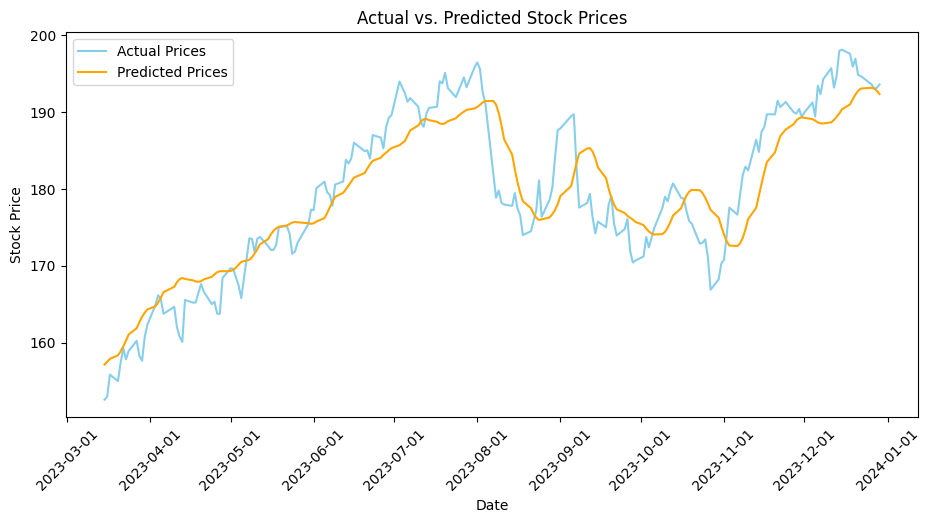

In [ ]:
plt.figure(figsize=(11,5),dpi=100)
plt.plot(df['date'][-len(y_test_original):], y_test_original, label='Actual Prices', color='skyblue')
plt.plot(df['date'][-len(test_predict):], test_predict, label='Predicted Prices', color='orange')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
from joblib import dump, load

# Saving the trained model using joblib
dump(model, 'lstm_stock_model.joblib')


['lstm_stock_model.joblib']

In [ ]:
# Loading the saved model using joblib
model = load('lstm_stock_model.joblib')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Preparing the data for prediction (using the last 100 data points)
future_input = df['close'].values[-101:-1]  # Using the last 100 closing prices
future_input = future_input.reshape(-1, 1)  # Reshape to a 2D array for scaling
scaler = MinMaxScaler(feature_range=(0, 1))  # Assuming scaler is fitted before
future_input = scaler.fit_transform(future_input)  # Scale the data
future_input = future_input.reshape(1, 100, 1)  # Reshape to (1, 100, 1) for LSTM input

# Make predictions for the future
future_predict = model.predict(future_input)

# Inverse transform the prediction to the original scale
future_predict = scaler.inverse_transform(future_predict)

# Print the predicted future price
print(f"Predicted future price: {future_predict}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted future price: [[187.19876]]


In [ ]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1001,2023-12-22 00:00:00+00:00,193.60,195.41,192.970,195.18,37149570,192.656691,194.457872,192.029760,194.228992,37149570,0.0,1.0
1002,2023-12-26 00:00:00+00:00,193.05,193.89,192.830,193.61,28919310,192.109371,192.945278,191.890442,192.666642,28919310,0.0,1.0
1003,2023-12-27 00:00:00+00:00,193.15,193.50,191.090,192.49,47899806,192.208883,192.557178,190.158921,191.552099,47899806,0.0,1.0
1004,2023-12-28 00:00:00+00:00,193.58,194.66,193.170,194.14,34049898,192.636788,193.711526,192.228786,193.194060,34049898,0.0,1.0
1005,2023-12-29 00:00:00+00:00,192.53,194.40,191.725,193.90,42672148,191.591904,193.452793,190.790827,192.955229,42672148,0.0,1.0
